In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('/content/loan_data.csv')

In [4]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [5]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

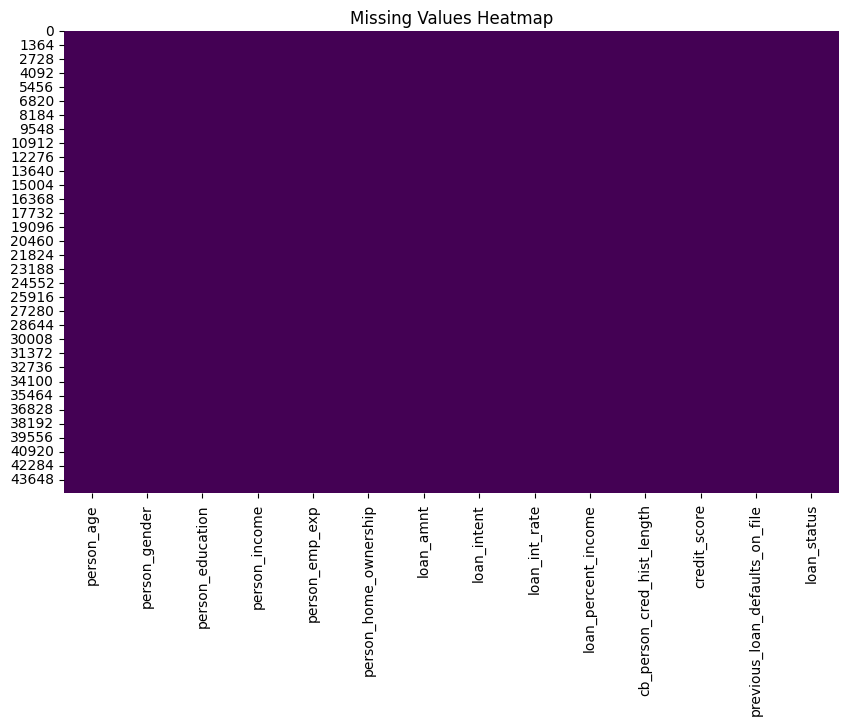

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [8]:
categorical_features = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

In [9]:
label_encoder = LabelEncoder()

for col in categorical_features:
    df[col] = label_encoder.fit_transform(df[col])

In [10]:
for col in categorical_features:
    print(df[col].unique())

[0 1]
[4 3 1 0 2]
[3 2 0 1]
[4 1 3 5 2 0]
[0 1]


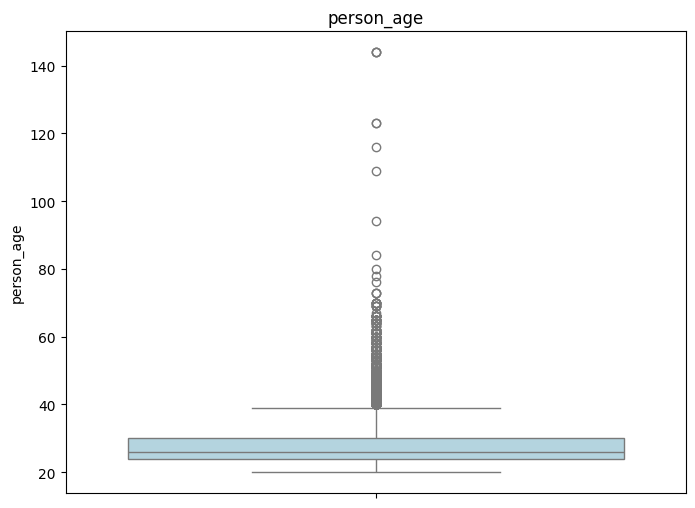

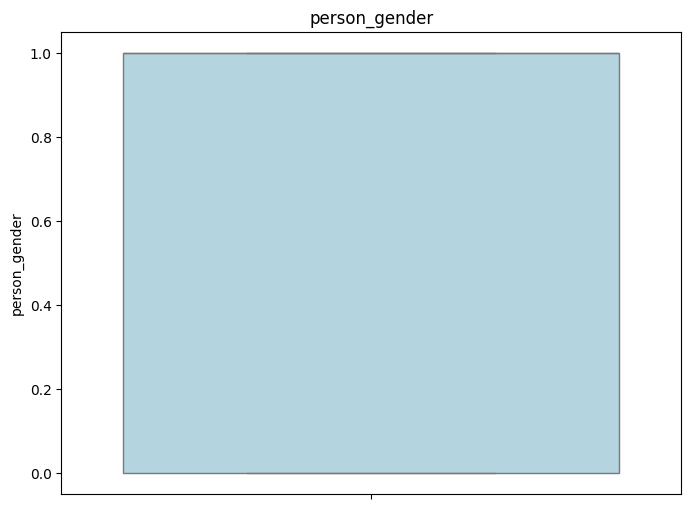

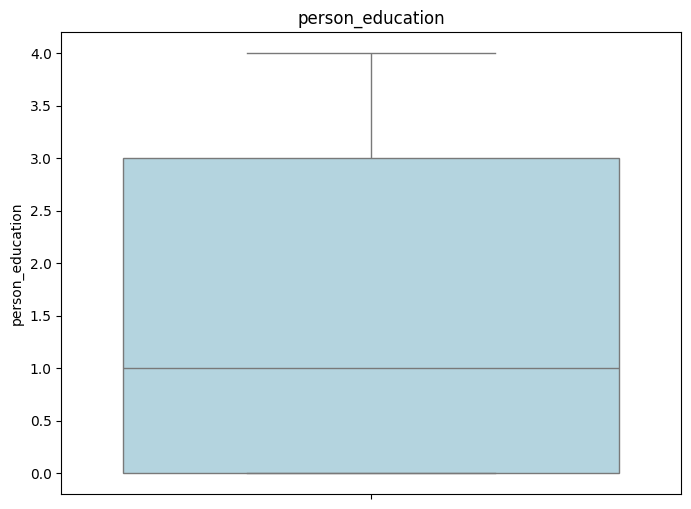

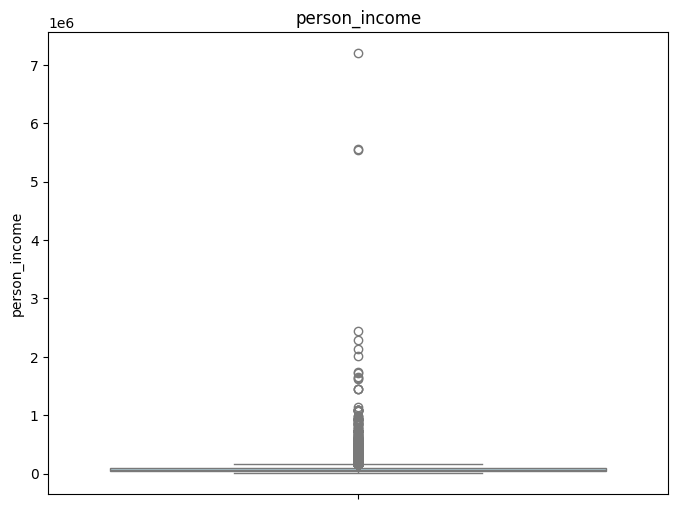

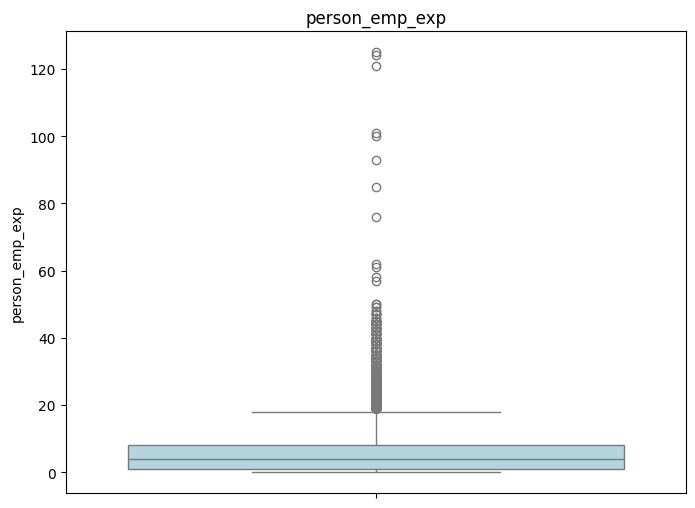

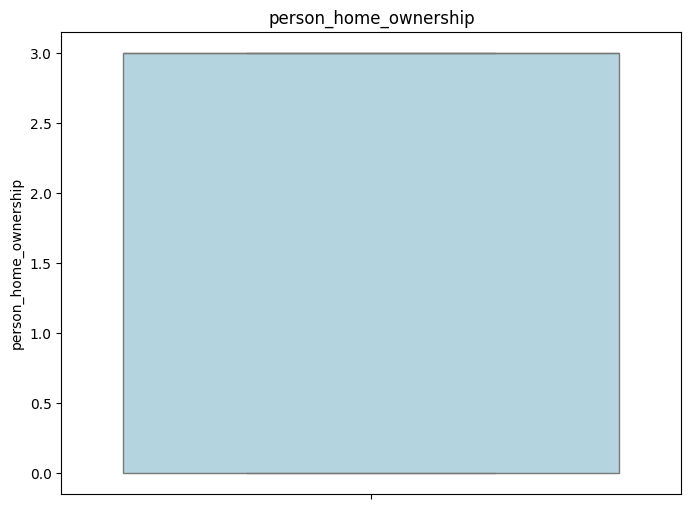

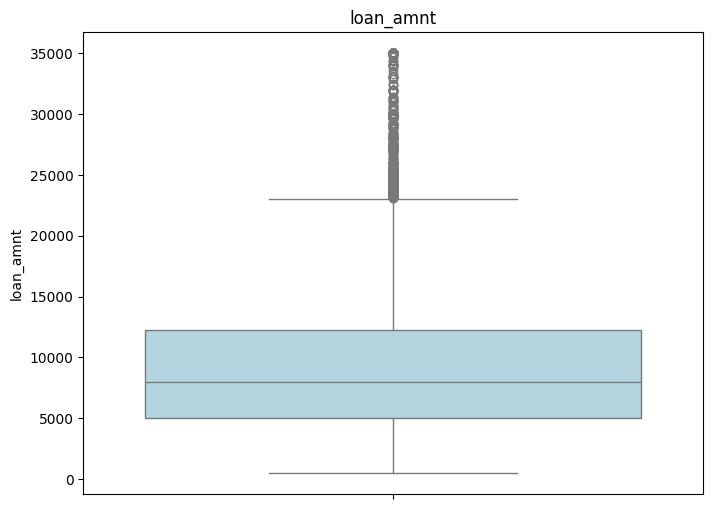

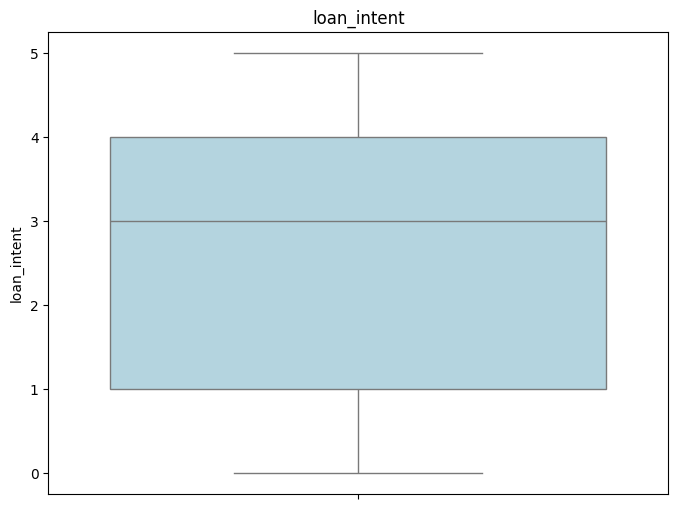

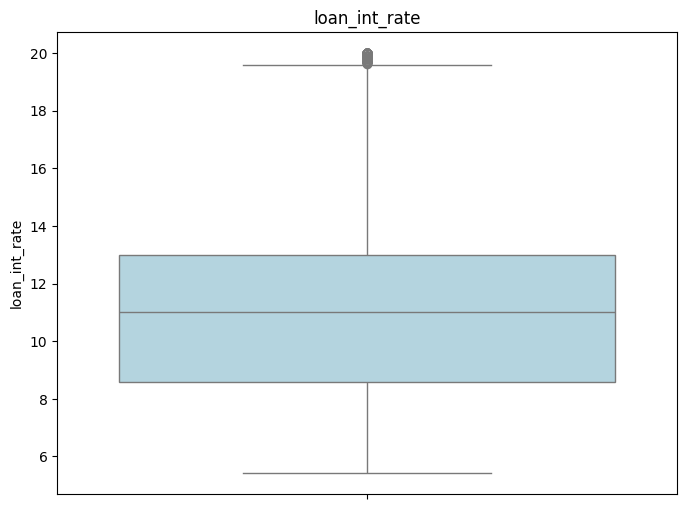

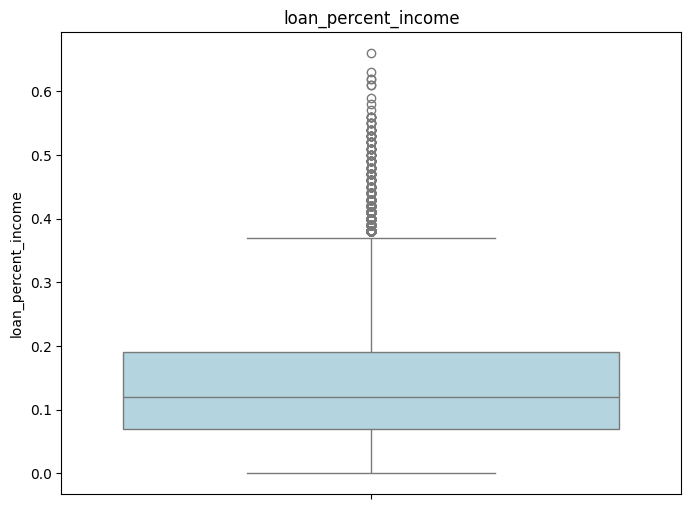

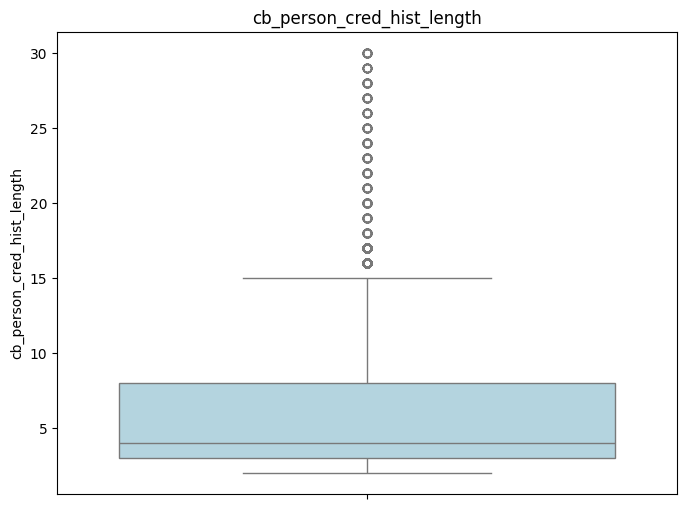

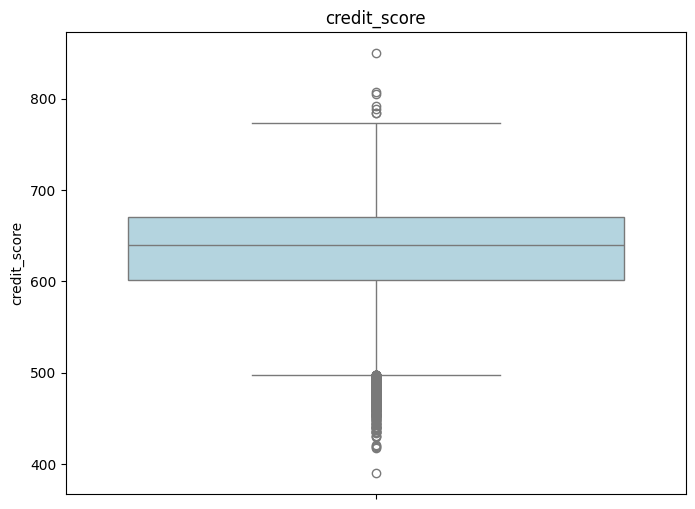

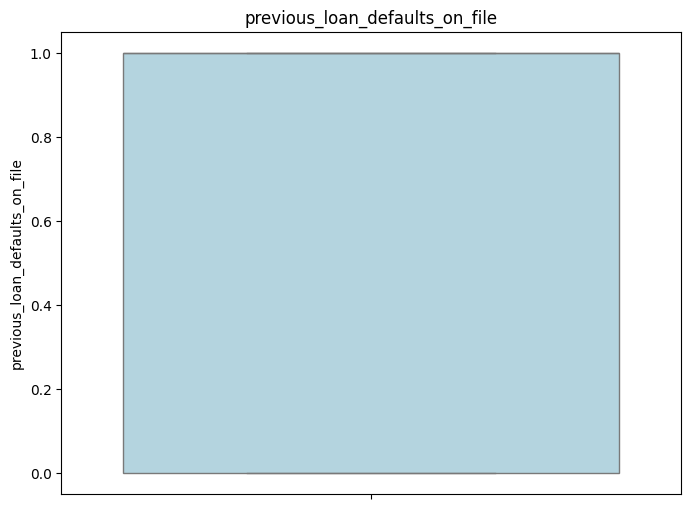

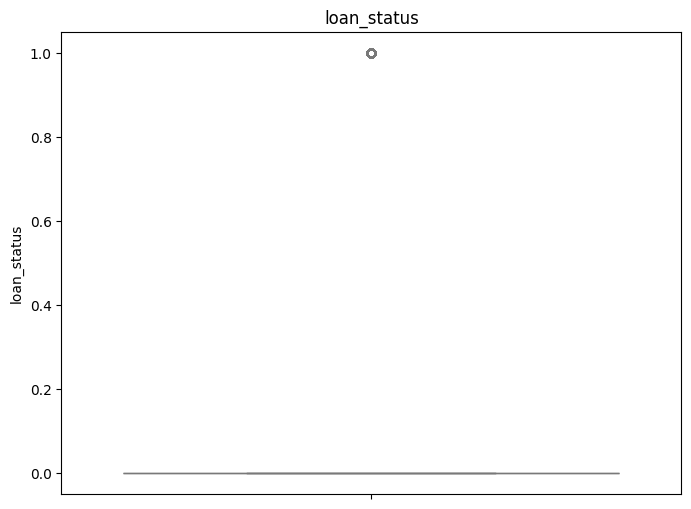

In [11]:
for graph in df:
    plt.figure(figsize=(8,6))
    sns.boxplot(data=df[graph], color='lightblue')
    plt.title(graph)
    plt.xticks(rotation=45)
    plt.show()

In [12]:
outlier_features =  ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']
for feature in outlier_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_whisker = Q3 + 1.5 * IQR
    median = df[feature].median()
    df[feature] = df[feature].apply(lambda x: median if x > upper_whisker else x)

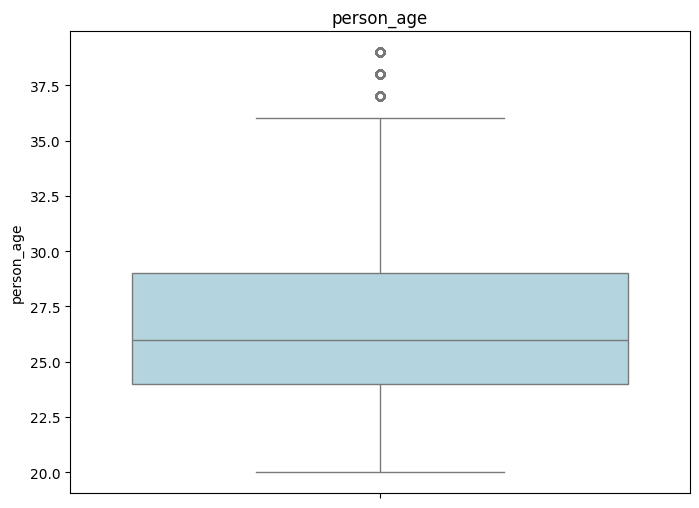

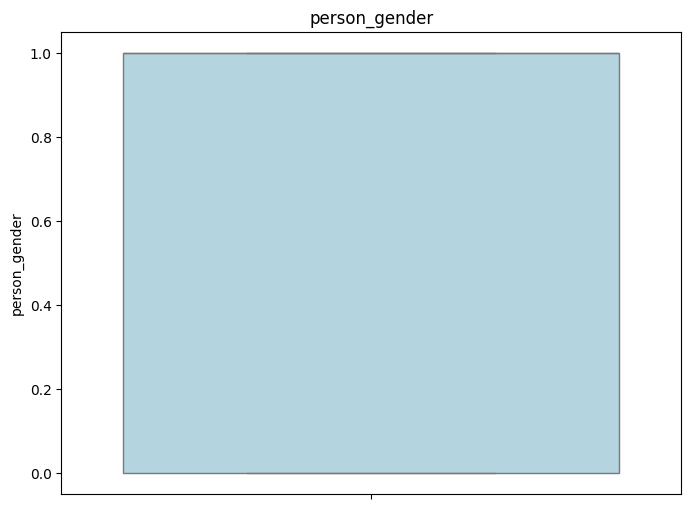

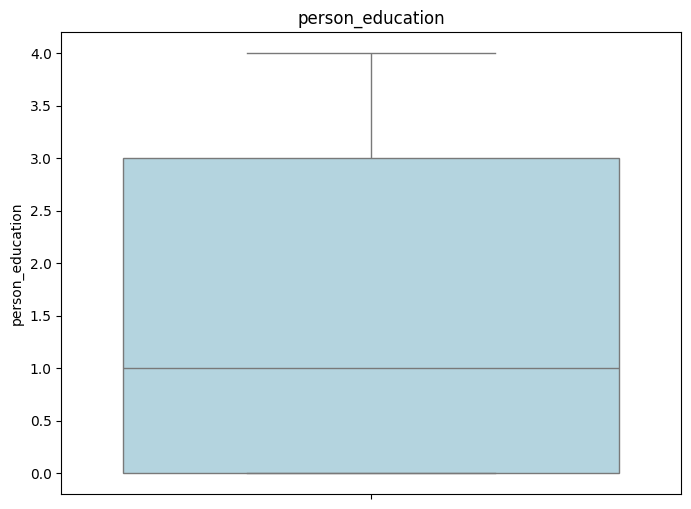

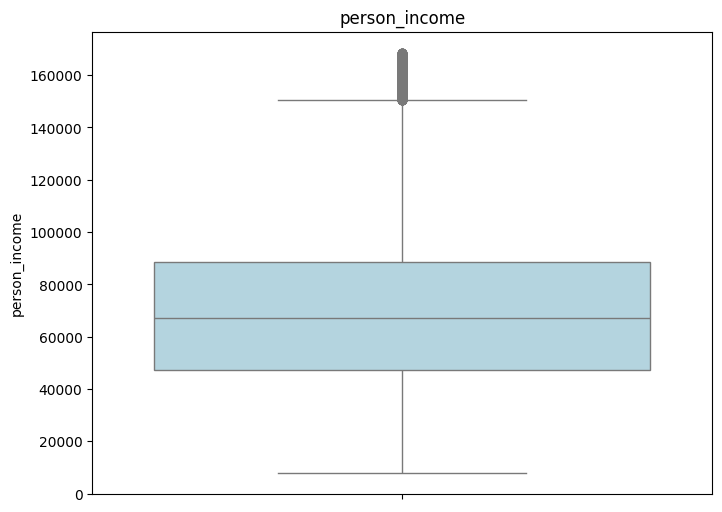

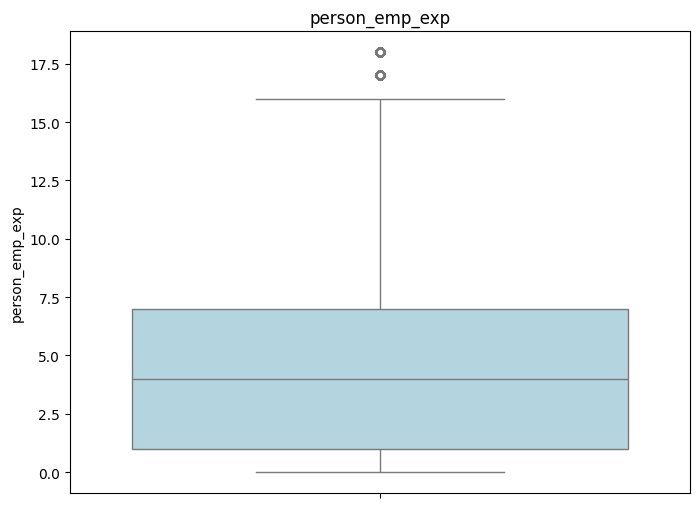

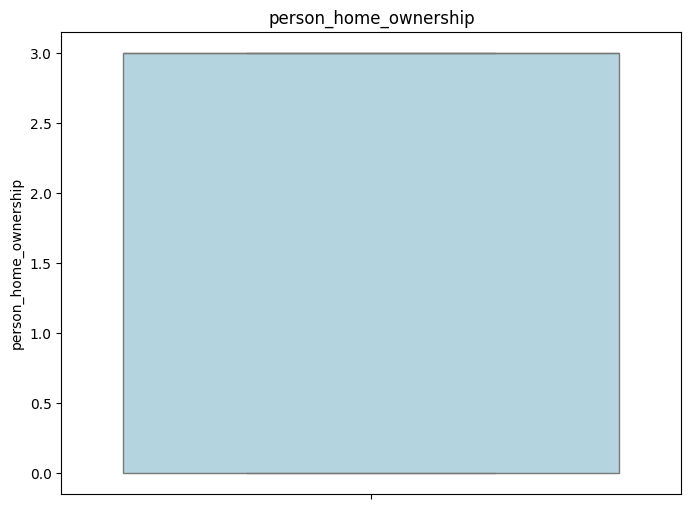

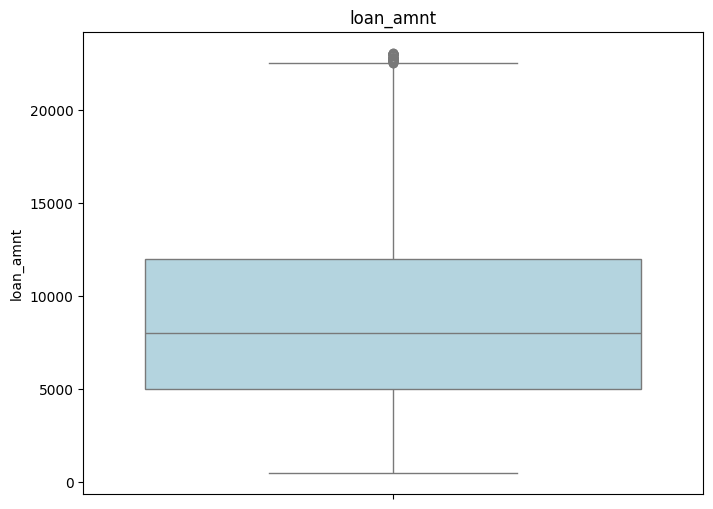

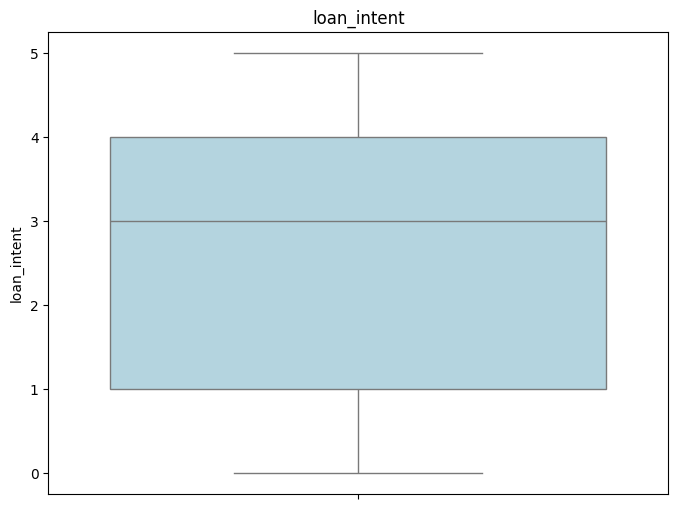

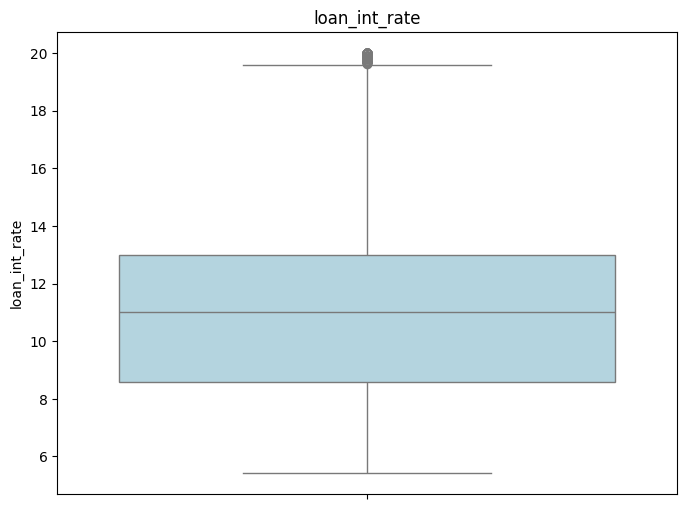

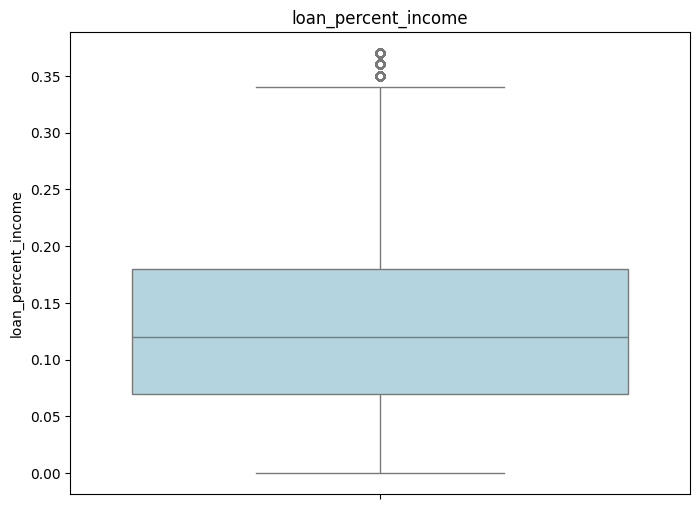

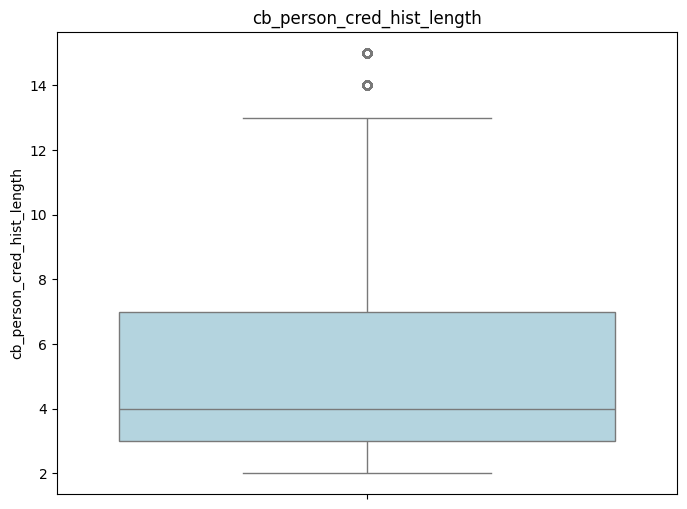

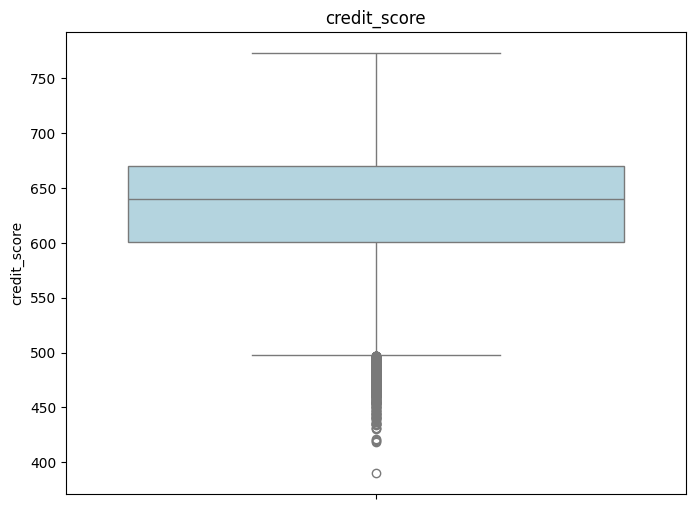

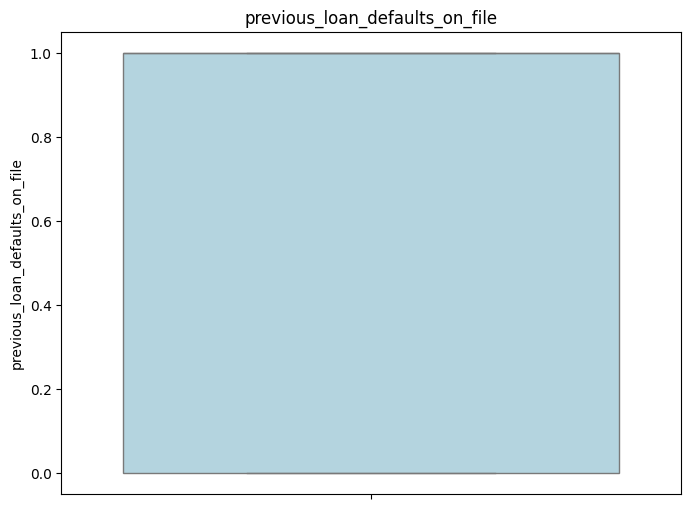

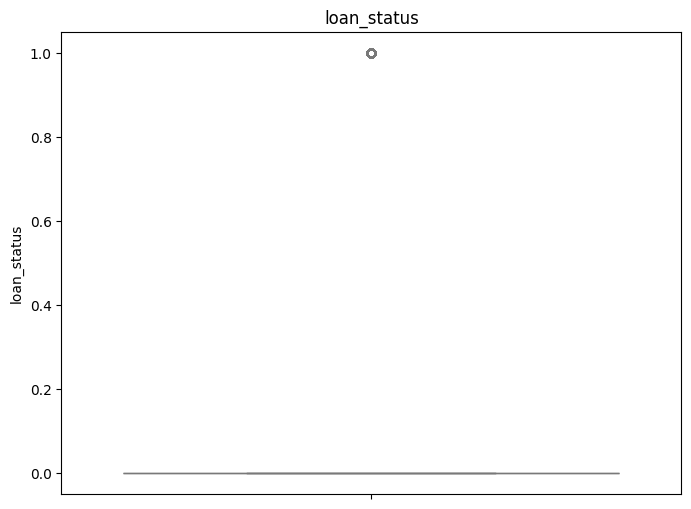

In [13]:
for graph in df:
    plt.figure(figsize=(8,6))
    sns.boxplot(data=df[graph], color='lightblue')
    plt.title(graph)
    plt.xticks(rotation=45)
    plt.show()

In [14]:
X = df.drop(columns=['loan_status'])
y = df[['loan_status']]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
model = LogisticRegression()

In [15]:
model.fit(X_train,y_train)

LogisticRegression()

In [16]:
model.coef_

array([[ 0.25278535,  0.04461309,  0.05389479, -2.63508763, -0.13934054,
         0.72245312, -0.26746189, -0.7369021 ,  4.52515195,  3.45855967,
        -0.08448218, -3.25117226, -7.69837482]])

In [17]:
model.intercept_

array([-0.59170748])

In [18]:
model.score(X_test, y_test)

0.8845555555555555

In [19]:
y_test

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [20]:
y_predict = model.predict(X_test)

In [21]:
y_predict

array([1., 1., 0., ..., 0., 0., 0.])

In [22]:
probabilities = model.predict_proba(X_test)

In [23]:
probabilities

array([[2.01458788e-01, 7.98541212e-01],
       [4.33840077e-01, 5.66159923e-01],
       [9.66610935e-01, 3.33890649e-02],
       ...,
       [9.36979006e-01, 6.30209945e-02],
       [9.99954574e-01, 4.54261479e-05],
       [9.99935195e-01, 6.48047920e-05]])

In [24]:
report  = classification_report(y_test, y_predict)

In [25]:
print(report)

              precision    recall  f1-score   support

         0.0       0.92      0.93      0.93      7011
         1.0       0.74      0.73      0.74      1989

    accuracy                           0.88      9000
   macro avg       0.83      0.83      0.83      9000
weighted avg       0.88      0.88      0.88      9000



In [26]:
confusion_matrix(y_test, y_predict)

array([[6508,  503],
       [ 536, 1453]])

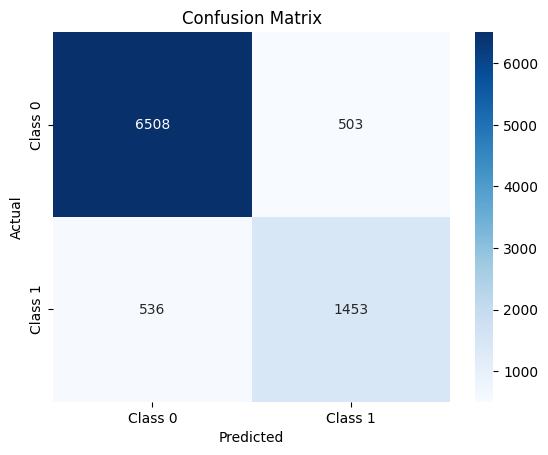

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()